# Introduction

1. Data Retrival & Cleaning
2. Data Analysis
3. Feature Engineering
4. Machine Learning
5. Hypergraph Neutral Network

In [4]:
#Imports 
import ast
import re
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from numpy import mean
import time
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import re
from scipy.stats import pearsonr
import math
from statistics import median
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
#import xgboost as xgb
#from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, accuracy_score
import json
#import wordcloud
import copy
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
train = pd.read_csv('data/final_train.csv')
test = pd.read_csv('data/test.csv')

## Statistics of the data

### 1. Overall: freqency and distribution

In [6]:
print("Shape of train : \n" + str(train.shape) + "\n")
print("Shape of test : \n" + str(test.shape) + "\n")
print("Number of NA Train for the variable budget : \n" + str(train[train.budget == 0].shape[0]) + "\n")
print("Number of NA Test for the variable budget : \n" + str(test[test.budget == 0].shape[0]))

Shape of train : 
(7292, 30)

Shape of test : 
(4398, 22)

Number of NA Train for the variable budget : 
1657

Number of NA Test for the variable budget : 
1211


In [7]:
#wordcloud for genres
train['lable'] = None
train["genres"] = train["genres"].fillna("[]")
for i in range(len(train)):
    s = train["genres"].iloc[i]
    s = str(s)
    if s=="[]":
        train.at[i,'lable'] = "None"
    else:
        s = s.replace("'", '"')
        s = json.loads(s)
        train.at[i,'lable'] = s[0]["name"]
wc_lable=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_lable.generate(' '.join(train['lable']))
plt.figure(figsize=(6,6))
plt.imshow(wc_lable)
plt.axis('off')
plt.show()

NameError: name 'wordcloud' is not defined

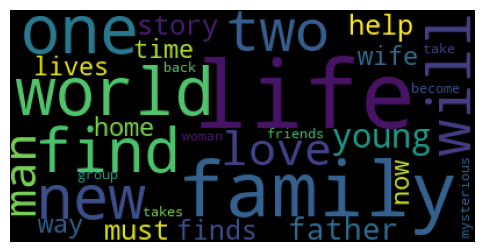

In [49]:
#wordcloud for overview
train['overview'] = train['overview'].fillna('')
wc_overview=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_overview.generate(' '.join(train['overview']))
plt.figure(figsize=(6,6))
plt.imshow(wc_overview)
plt.axis('off')
plt.show()

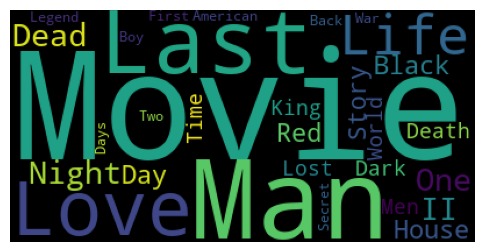

In [50]:
#wordcloud for title
train['title'] = train['title'].fillna('')
wc_title=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_title.generate(' '.join(train['title']))
plt.figure(figsize=(6,6))
plt.imshow(wc_title)
plt.axis('off')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

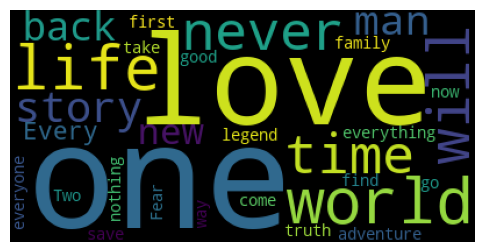

In [51]:
#wordcloud for tagline
train['tagline'] = train['tagline'].fillna('')
wc_tagline=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_tagline.generate(' '.join(train['tagline']))
plt.figure(figsize=(6,6))
plt.imshow(wc_tagline)
plt.axis('off')

C:\Users\zjy\AppData\Local\Temp\ipykernel_23548\2754632351.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["revenue"][train["revenue"]<100000000],color="r",bins=20)


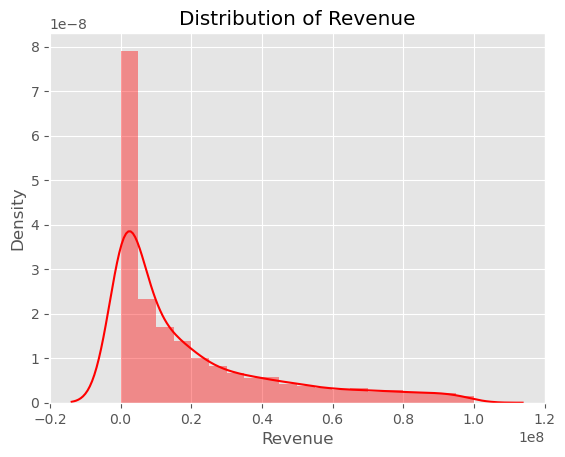

In [52]:
#distribution of revenue in train
sns.distplot(train["revenue"][train["revenue"]<100000000],color="r",bins=20)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_23548\3601421505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["budget"][train["budget"]<100000000],color="b",bins=20)


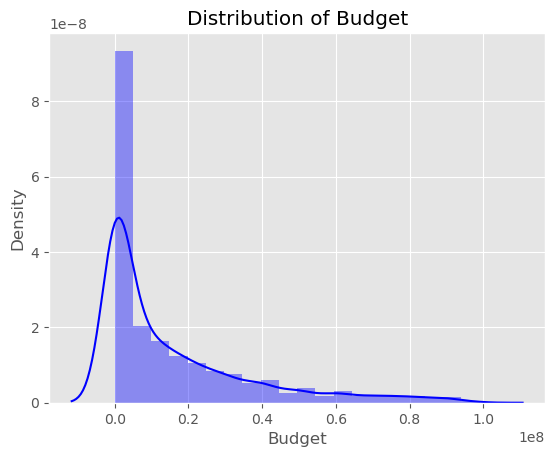

In [53]:
#distribution of budget in train
sns.distplot(train["budget"][train["budget"]<100000000],color="b",bins=20)
plt.title("Distribution of Budget")
plt.xlabel("Budget")
plt.ylabel("Density")
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_23548\2940846225.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test["budget"][test["budget"]<100000000],color="b",bins=20)


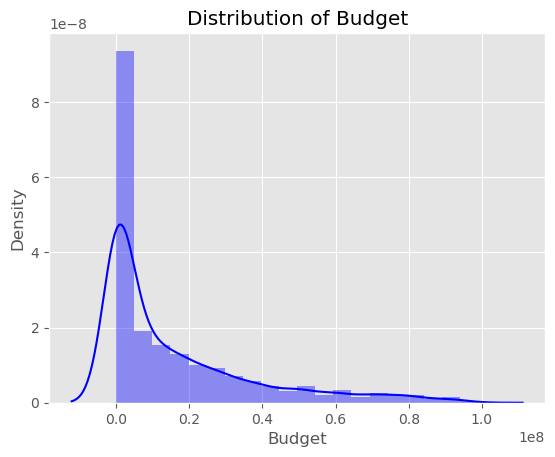

In [54]:
#distribution of revenue in test
sns.distplot(test["budget"][test["budget"]<100000000],color="b",bins=20)
plt.title("Distribution of Budget")
plt.xlabel("Budget")
plt.ylabel("Density")
plt.show()

In [55]:
#Beacuse of the high skewness of the revenue and budget, we will use the log transformation
train['log_revenue'] = np.log1p(train['revenue'])
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

C:\Users\zjy\AppData\Local\Temp\ipykernel_23548\332190283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["log_revenue"],color="r",bins=20)


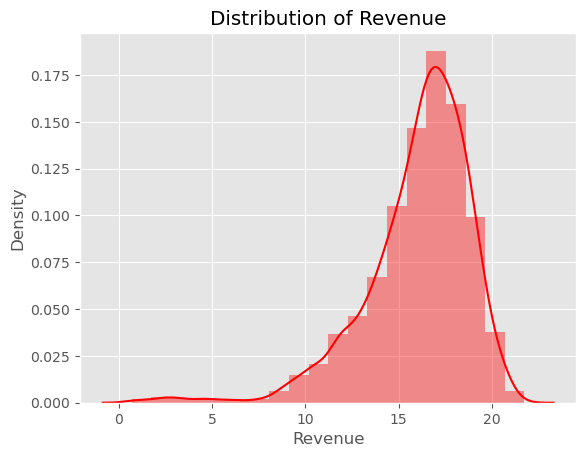

In [56]:
#distribution of log revenue in train
sns.distplot(train["log_revenue"],color="r",bins=20)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_23548\3078896269.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["log_budget"],color="b",bins=20)


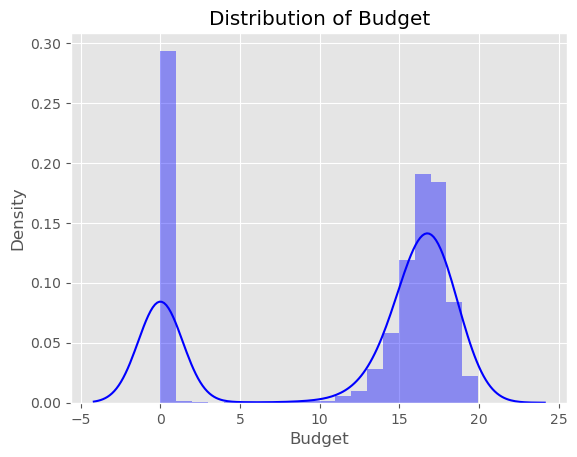

In [57]:
#distribution of log budget in train
sns.distplot(train["log_budget"],color="b",bins=20)
plt.title("Distribution of Budget")
plt.xlabel("Budget")
plt.ylabel("Density")
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_23548\84027248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test["log_budget"],color="b",bins=20)


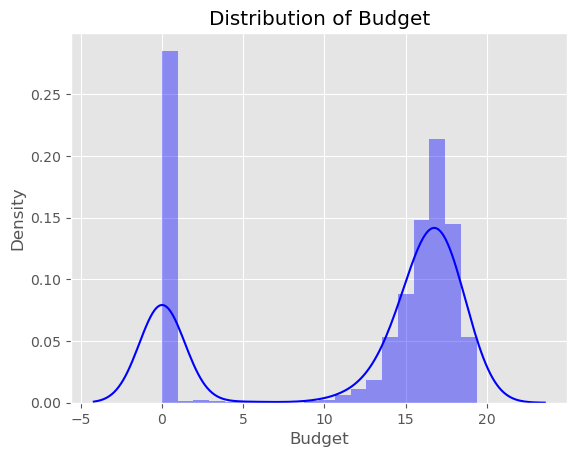

In [58]:
#distribution of log budget in test
sns.distplot(test["log_budget"],color="b",bins=20)
plt.title("Distribution of Budget")
plt.xlabel("Budget")
plt.ylabel("Density")
plt.show()

In [64]:
# function to plot the distribution of a feature
def plot_dist(field, color):
    f, ax = plt.subplots(3, figsize=(10,6))

    sns.set(rc={'figure.figsize':(12,8)})
    sns.boxplot(x=train[field], ax = ax[0], color=color)
    ax[0].set_title(f"Box Plot of {field} variable")
    sns.distplot(a=train[field], kde = False, ax = ax[1], color=color, hist_kws=dict(alpha=1))
    ax[1].set_title(f"Histogram of {field} variable")
    sns.distplot(a=np.log1p(train[field]), kde = False, ax = ax[2], color=color, hist_kws=dict(alpha=1))
    ax[2].set_title(f"Log1p transformed {field} Histogram")
    f.tight_layout()

### 2. Revenue

C:\Users\zjy\AppData\Local\Temp\ipykernel_23548\485708692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train[field], kde = False, ax = ax[1], color=color, hist_kws=dict(alpha=1))
C:\Users\zjy\AppData\Local\Temp\ipykernel_23548\485708692.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

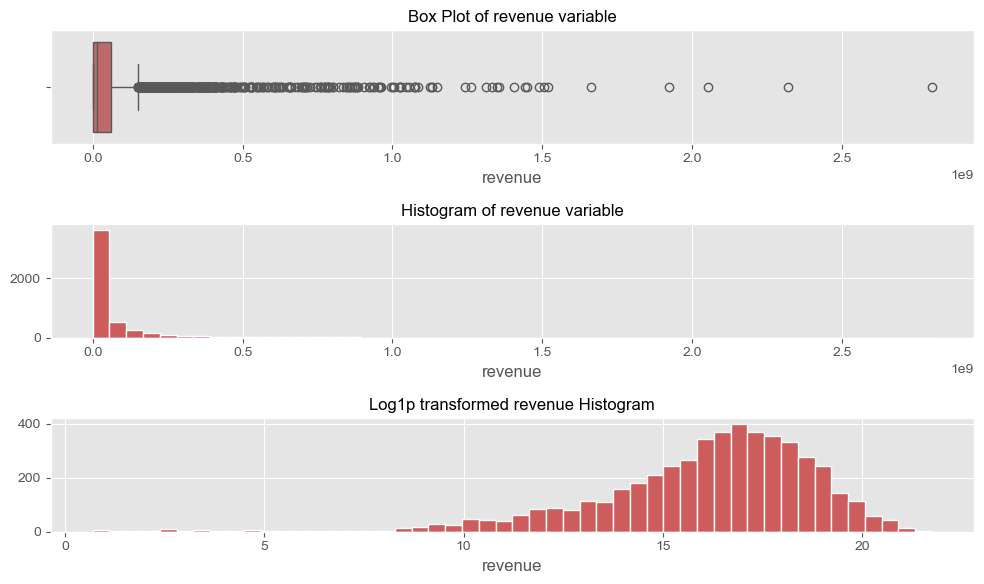

In [65]:
plot_dist('revenue', 'indianred')

In [66]:
train.revenue.nsmallest(20)

347      1
1753     1
1873     1
1916     1
4287     1
695      2
334      3
1540     3
2381     3
2116     4
1345     5
2488     6
1190     7
639      8
2250     8
2580     8
280     10
665     10
3177    10
1141    11
Name: revenue, dtype: int64

# 1. Data Rerival

## True value of the data

In [9]:
train_true=train.__deepcopy__()
test_true=test.__deepcopy__()

In [10]:
train_true.loc[train_true['id'] == 16,'revenue'] = 192864         
train_true.loc[train_true['id'] == 90,'budget'] = 30000000                  
train_true.loc[train_true['id'] == 118,'budget'] = 60000000       
train_true.loc[train_true['id'] == 149,'budget'] = 18000000       
train_true.loc[train_true['id'] == 313,'revenue'] = 12000000       
train_true.loc[train_true['id'] == 451,'revenue'] = 12000000      
train_true.loc[train_true['id'] == 464,'budget'] = 20000000       
train_true.loc[train_true['id'] == 470,'budget'] = 13000000       
train_true.loc[train_true['id'] == 513,'budget'] = 930000         
train_true.loc[train_true['id'] == 797,'budget'] = 8000000        
train_true.loc[train_true['id'] == 819,'budget'] = 90000000       
train_true.loc[train_true['id'] == 850,'budget'] = 90000000       
train_true.loc[train_true['id'] == 1007,'budget'] = 2              
train_true.loc[train_true['id'] == 1112,'budget'] = 7500000       
train_true.loc[train_true['id'] == 1131,'budget'] = 4300000        
train_true.loc[train_true['id'] == 1359,'budget'] = 10000000       
train_true.loc[train_true['id'] == 1542,'budget'] = 1             
train_true.loc[train_true['id'] == 1570,'budget'] = 15800000       
train_true.loc[train_true['id'] == 1571,'budget'] = 4000000        
train_true.loc[train_true['id'] == 1714,'budget'] = 46000000       
train_true.loc[train_true['id'] == 1721,'budget'] = 17500000       
train_true.loc[train_true['id'] == 1865,'revenue'] = 25000000      
train_true.loc[train_true['id'] == 1885,'budget'] = 12             
train_true.loc[train_true['id'] == 2091,'budget'] = 10             
train_true.loc[train_true['id'] == 2268,'budget'] = 17500000       
train_true.loc[train_true['id'] == 2491,'budget'] = 6              
train_true.loc[train_true['id'] == 2602,'budget'] = 31000000       
train_true.loc[train_true['id'] == 2612,'budget'] = 15000000       
train_true.loc[train_true['id'] == 2696,'budget'] = 10000000      
train_true.loc[train_true['id'] == 2801,'budget'] = 10000000       
train_true.loc[train_true['id'] == 335,'budget'] = 2 
train_true.loc[train_true['id'] == 348,'budget'] = 12
train_true.loc[train_true['id'] == 470,'budget'] = 13000000 
train_true.loc[train_true['id'] == 513,'budget'] = 1100000
train_true.loc[train_true['id'] == 640,'budget'] = 6 
train_true.loc[train_true['id'] == 696,'budget'] = 1
train_true.loc[train_true['id'] == 797,'budget'] = 8000000 
train_true.loc[train_true['id'] == 850,'budget'] = 1500000
train_true.loc[train_true['id'] == 1199,'budget'] = 5 
train_true.loc[train_true['id'] == 1282,'budget'] = 9              
train_true.loc[train_true['id'] == 1347,'budget'] = 1
train_true.loc[train_true['id'] == 1755,'budget'] = 2
train_true.loc[train_true['id'] == 1801,'budget'] = 5
train_true.loc[train_true['id'] == 1918,'budget'] = 592 
train_true.loc[train_true['id'] == 2033,'budget'] = 4
train_true.loc[train_true['id'] == 2118,'budget'] = 344 
train_true.loc[train_true['id'] == 2252,'budget'] = 130
train_true.loc[train_true['id'] == 2256,'budget'] = 1 
train_true.loc[train_true['id'] == 2696,'budget'] = 10000000

In [11]:
test_true.loc[test_true['id'] == 3033,'budget'] = 250 
test_true.loc[test_true['id'] == 3051,'budget'] = 50
test_true.loc[test_true['id'] == 3084,'budget'] = 337
test_true.loc[test_true['id'] == 3224,'budget'] = 4  
test_true.loc[test_true['id'] == 3594,'budget'] = 25  
test_true.loc[test_true['id'] == 3619,'budget'] = 500  
test_true.loc[test_true['id'] == 3831,'budget'] = 3  
test_true.loc[test_true['id'] == 3935,'budget'] = 500  
test_true.loc[test_true['id'] == 4049,'budget'] = 995946 
test_true.loc[test_true['id'] == 4424,'budget'] = 3  
test_true.loc[test_true['id'] == 4460,'budget'] = 8  
test_true.loc[test_true['id'] == 4555,'budget'] = 1200000 
test_true.loc[test_true['id'] == 4624,'budget'] = 30 
test_true.loc[test_true['id'] == 4645,'budget'] = 500 
test_true.loc[test_true['id'] == 4709,'budget'] = 450 
test_true.loc[test_true['id'] == 4839,'budget'] = 7
test_true.loc[test_true['id'] == 3125,'budget'] = 25 
test_true.loc[test_true['id'] == 3142,'budget'] = 1
test_true.loc[test_true['id'] == 3201,'budget'] = 450
test_true.loc[test_true['id'] == 3222,'budget'] = 6
test_true.loc[test_true['id'] == 3545,'budget'] = 38
test_true.loc[test_true['id'] == 3670,'budget'] = 18
test_true.loc[test_true['id'] == 3792,'budget'] = 19
test_true.loc[test_true['id'] == 3881,'budget'] = 7
test_true.loc[test_true['id'] == 3969,'budget'] = 400
test_true.loc[test_true['id'] == 4196,'budget'] = 6
test_true.loc[test_true['id'] == 4221,'budget'] = 11
test_true.loc[test_true['id'] == 4222,'budget'] = 500
test_true.loc[test_true['id'] == 4285,'budget'] = 11
test_true.loc[test_true['id'] == 4319,'budget'] = 1
test_true.loc[test_true['id'] == 4639,'budget'] = 10
test_true.loc[test_true['id'] == 4719,'budget'] = 45
test_true.loc[test_true['id'] == 4822,'budget'] = 22
test_true.loc[test_true['id'] == 4829,'budget'] = 20
test_true.loc[test_true['id'] == 4969,'budget'] = 20
test_true.loc[test_true['id'] == 5021,'budget'] = 40 
test_true.loc[test_true['id'] == 5035,'budget'] = 1 
test_true.loc[test_true['id'] == 5063,'budget'] = 14 
test_true.loc[test_true['id'] == 5119,'budget'] = 2 
test_true.loc[test_true['id'] == 5214,'budget'] = 30 
test_true.loc[test_true['id'] == 5221,'budget'] = 50 
test_true.loc[test_true['id'] == 4903,'budget'] = 15
test_true.loc[test_true['id'] == 4983,'budget'] = 3
test_true.loc[test_true['id'] == 5102,'budget'] = 28
test_true.loc[test_true['id'] == 5217,'budget'] = 75
test_true.loc[test_true['id'] == 5224,'budget'] = 3 
test_true.loc[test_true['id'] == 5469,'budget'] = 20 
test_true.loc[test_true['id'] == 5840,'budget'] = 1 
test_true.loc[test_true['id'] == 5960,'budget'] = 30
test_true.loc[test_true['id'] == 6506,'budget'] = 11 
test_true.loc[test_true['id'] == 6553,'budget'] = 280
test_true.loc[test_true['id'] == 6561,'budget'] = 7
test_true.loc[test_true['id'] == 6582,'budget'] = 218
test_true.loc[test_true['id'] == 6638,'budget'] = 5
test_true.loc[test_true['id'] == 6749,'budget'] = 8 
test_true.loc[test_true['id'] == 6759,'budget'] = 50 
test_true.loc[test_true['id'] == 6856,'budget'] = 10
test_true.loc[test_true['id'] == 6858,'budget'] =  100
test_true.loc[test_true['id'] == 6876,'budget'] =  250
test_true.loc[test_true['id'] == 6972,'budget'] = 1
test_true.loc[test_true['id'] == 7079,'budget'] = 8000000
test_true.loc[test_true['id'] == 7150,'budget'] = 118
test_true.loc[test_true['id'] == 6506,'budget'] = 118
test_true.loc[test_true['id'] == 7225,'budget'] = 6
test_true.loc[test_true['id'] == 7231,'budget'] = 85
test_true.loc[test_true['id'] == 5222,'budget'] = 5
test_true.loc[test_true['id'] == 5322,'budget'] = 90
test_true.loc[test_true['id'] == 5350,'budget'] = 70
test_true.loc[test_true['id'] == 5378,'budget'] = 10
test_true.loc[test_true['id'] == 5545,'budget'] = 80
test_true.loc[test_true['id'] == 5810,'budget'] = 8
test_true.loc[test_true['id'] == 5926,'budget'] = 300
test_true.loc[test_true['id'] == 5927,'budget'] = 4
test_true.loc[test_true['id'] == 5986,'budget'] = 1
test_true.loc[test_true['id'] == 6053,'budget'] = 20
test_true.loc[test_true['id'] == 6104,'budget'] = 1
test_true.loc[test_true['id'] == 6130,'budget'] = 30
test_true.loc[test_true['id'] == 6301,'budget'] = 150
test_true.loc[test_true['id'] == 6276,'budget'] = 100
test_true.loc[test_true['id'] == 6473,'budget'] = 100
test_true.loc[test_true['id'] == 6842,'budget'] = 30

In [12]:
cols_to_drop = ['adult', 'backdrop_path', 'video', 'vote_count', 'vote_average']
train.drop(cols_to_drop, axis=1, inplace=True)
train_true.drop(cols_to_drop, axis=1, inplace=True)

Text(0.5, 1.0, 'Missing Value count By Features')

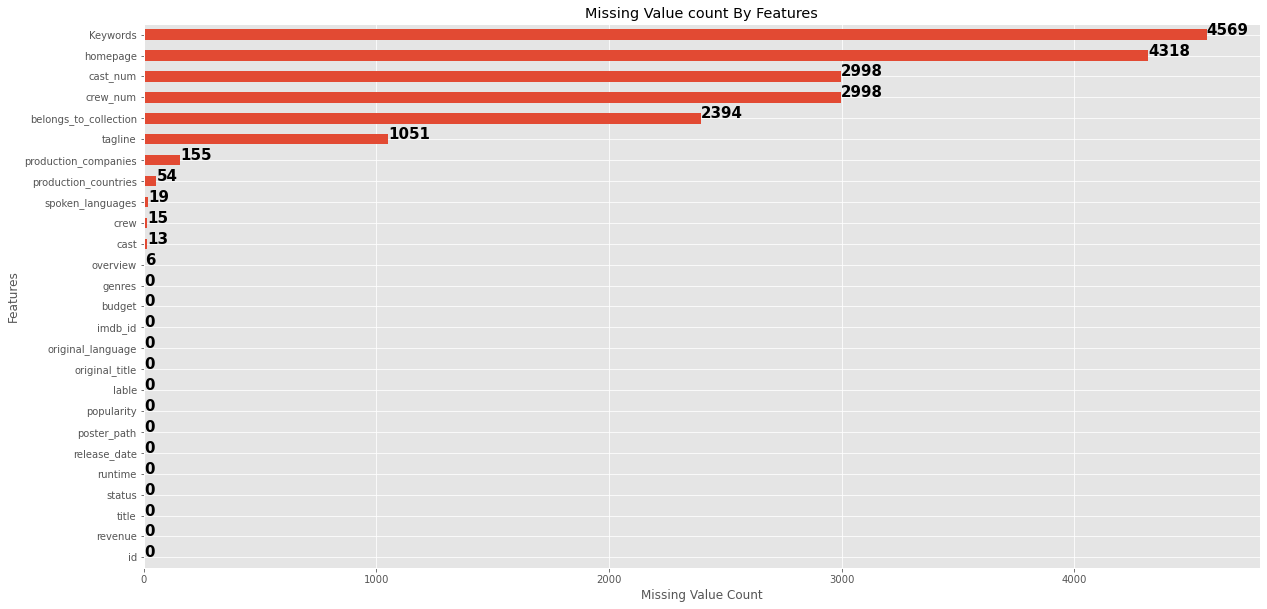

In [16]:
train_true.isna().sum().sort_values(ascending=True).plot(kind="barh", figsize=(20,10))
for i, v in enumerate(train_true.isna().sum().sort_values(ascending=True)):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

<AxesSubplot:xlabel='budget', ylabel='revenue'>

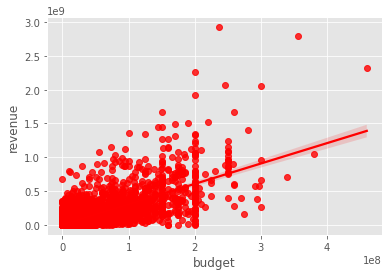

In [30]:
sns.regplot(x="budget", y="revenue", data = train_true, color = 'red')

<AxesSubplot:xlabel='popularity', ylabel='revenue'>

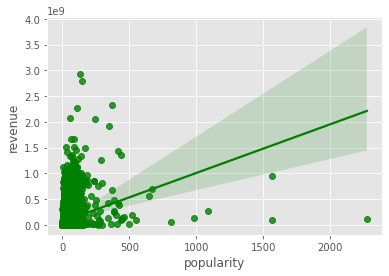

In [31]:
sns.regplot(x="popularity", y="revenue", data = train_true, color = 'green')

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

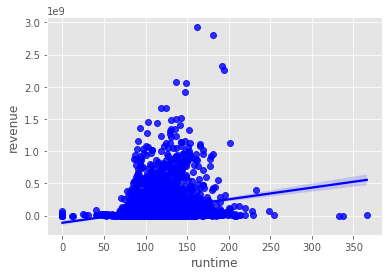

In [32]:
sns.regplot(x="runtime", y="revenue", data = train_true, color = 'blue')

<AxesSubplot:xlabel='cast_num', ylabel='revenue'>

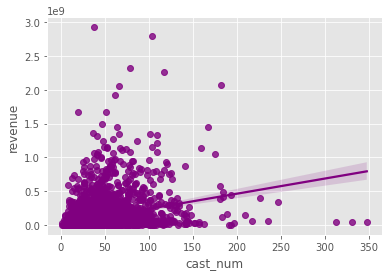

In [33]:
sns.regplot(x="cast_num", y="revenue", data = train_true, color = 'purple')

<AxesSubplot:xlabel='crew_num', ylabel='revenue'>

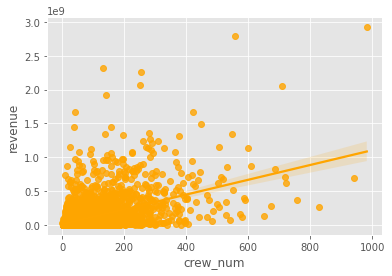

In [34]:
sns.regplot(x="crew_num", y="revenue", data = train_true, color = 'orange')

             revenue    budget  popularity   runtime  cast_num  crew_num
revenue     1.000000  0.728093    0.290242  0.223805  0.305196  0.478006
budget      0.728093  1.000000    0.282668  0.244916  0.336709  0.523629
popularity  0.290242  0.282668    1.000000  0.089806  0.073340  0.158322
runtime     0.223805  0.244916    0.089806  1.000000  0.341924  0.171717
cast_num    0.305196  0.336709    0.073340  0.341924  1.000000  0.270079
crew_num    0.478006  0.523629    0.158322  0.171717  0.270079  1.000000


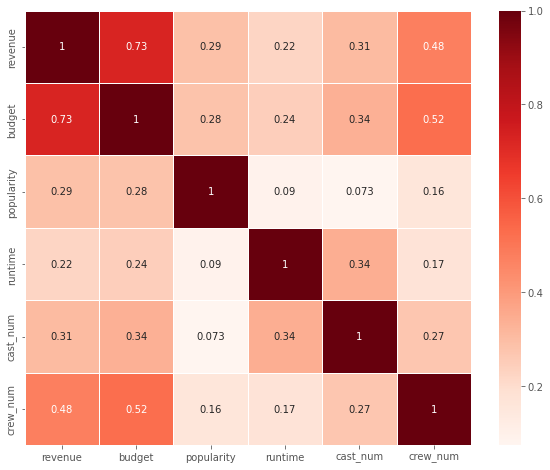

In [35]:
col = ['revenue','budget','popularity','runtime','cast_num','crew_num']

plt.subplots(figsize=(10, 8))

corr = train_true[col].corr()

sns.heatmap(corr, annot = True, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

print(corr)